This dataset has  9384  apps
This dataset has  10292  traces


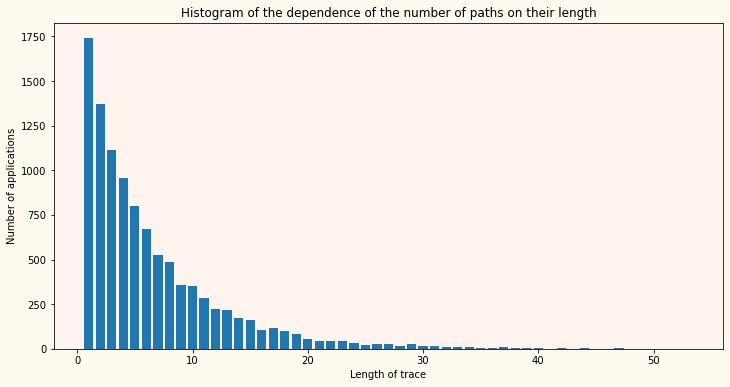

Maximum depth of a UI-tree in this dataset is:  32 . And it is achieved on the app:  com.zillow.android.rentals


In [79]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json

def dicts_in_list(l: list): #returns a list of all dictionaries
    dicts = [] #list of dictionaries
    for item in l:
        if isinstance(item, dict): #adding a new dictionary in a list
            dicts.append(item)
        elif isinstance(item, list): #recursion if it is a list
            dicts = dicts + dicts_in_list(item)
    return dicts

def dict_len(mydict, count=0): #returns dictionary depth
    branches = [] #list of branches depths
    for key in mydict or ():
        if isinstance(mydict[key], dict):
            branches.append(1) #adding a new branch if we have a dictionary
            count = dict_len(mydict[key], count) 
            branches[-1] += count #adding a number we had got from recursion 
        elif isinstance(mydict[key], list):
            for item in dicts_in_list(mydict[key]): #sorting through the dictionaries in the list and adding new branches
                branches.append(1)
                count = dict_len(item, count)
                branches[-1] += count
    if not branches:
        count = 0
    else:
        count = max(branches)
    return count


path1 = os.getcwd(); #getting a name of your dir
path = os.path.join(path1,"filtered_traces" ) #getting a path to a dataset
cur_path = path #current path
count_of_apps = 0 #amount of apps in dataset
count_of_traces = 0; #amount of traces in dataset
max_count = 0; #max length of a trace
max_depth = 0; #max depth of a UI-tree
app_with_max_depth = ""
screen_count = 0; #current length of a trace
depth = 0; #current depth 
with os.scandir(path) as List:
    for entry in List:
        count_of_apps += 1
        with os.scandir(entry.path) as List1:
            for entry1 in List1:
                count_of_traces += 1
                with os.scandir(entry1.path) as List2:
                    for entry2 in List2:
                        if (entry2.name == "screenshots") :
                            with os.scandir(entry2.path) as List3:
                                for entry3 in List3:
                                    screen_count += 1
                                if (screen_count > max_count) :
                                    max_count = screen_count
                                screen_count = 0
    max_count >>= 1 #Division by 2 using a bit shift, because in my dataset there is a duplication
#of files of the form: ._a.jpg and a.jpg

#Finished counting all the necessary values
print("This dataset has ", count_of_apps, " apps")
print("This dataset has ",count_of_traces, " traces")
#Starting finding the number of paths of different lengths
x = np.arange(1, max_count + 1)
y = np.zeros(max_count + 1, dtype = int)
with os.scandir(path) as List:
    for entry in List:
        with os.scandir(entry.path) as List1:
            for entry1 in List1:
                with os.scandir(entry1.path) as List2:
                    for entry2 in List2:
                        if (entry2.name == "screenshots") :
                            with os.scandir(entry2.path) as List3:
                                for entry3 in List3:
                                    screen_count += 1
                                screen_count >>= 1 #similarly with the operation on max_count
                                y[screen_count] += 1
                                screen_count = 0
#Building a histogram based on the data obtained the number of traces of different lengths
fig, ax = plt.subplots()
ax.bar(x, y[1:])
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)   
fig.set_figheight(6)    
ax.set_xlabel("Length of trace")
ax.set_ylabel("Number of applications")
ax.set_title("Histogram of the dependence of the number of paths on their length")
plt.show()

with os.scandir(path) as List:
    for entry in List:
        with os.scandir(entry.path) as List1:
            for entry1 in List1:
                with os.scandir(entry1.path) as List2:
                    for entry2 in List2:
                        if (entry2.name == "view_hierarchies") :
                            with os.scandir(entry2.path) as List3:
                                for entry3 in List3:
                                    if (entry3.name[:2] != "._") :
                                        cur_path = os.path.join(entry2.path,entry3.name)
                                        with open(cur_path) as file:
                                            dict1 = json.load(file)
                                            depth = dict_len(dict1)
                                            if (depth > max_depth) :
                                                max_depth = depth
                                                app_with_max_depth = entry.name
print("Maximum depth of a UI-tree in this dataset is:",max_depth,".And it is achieved on the app: ", app_with_max_depth)

                                                
                                    
